# Autoencoders en Machine Learning - Parte I

**Según Federico:**

Los autoencoders buscan aprender una función que comprime los datos que recibe, reduciéndolos a una representación codificada de dimensión mucho menor, y luego los reconstruye de vuelta a su forma original a una aproximación cercana.

Es como tener un dibujo en un lienzo gigante y querer guardarlo en tu bolsillo. El autoencoder verá el dibujo, tomará los puntos más importantes y hará una versión "en miniatura" de ese dibujo. Después, cuando se desee volver a ver el dibujo a tamaño real, el autoencoder puede volver a recrearlos con alta precisión a partir de una fórmula que ha utilizado para comprimirlo y descomprimirlo.

Para trabajar con autoencoders, se requiere instalar `tensorflow` (ya que no viene con Anaconda).

In [1]:
# Instalar TensorFlow
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 7.3 MB/s eta 0:00:53
   ---------------------------------------- 0.7/385.2 MB 7.4 MB/s eta 0:00:52
   ---------------------------------------- 1.3/385.2 MB 9.4 MB/s eta 0:00:41
   ---------------------------------------- 2.8/385.2 MB 14.7 MB/s eta 0:00:27
   ---------------------------------------- 4.1/385.2 MB 17.6 MB/s eta 0:00:22
    --------------------------------------- 5.7/385.2 MB 20.2 MB/s eta 0:00:19
    --------------------------------------- 6.5/385.2 MB 20.8 MB/s eta 0:00:19
    --------------------------------------- 7.0/385.2 MB 19.5 MB/s eta 0:00:20
    --------------------------------------- 8.5/385.2 MB 20.0

In [2]:
# Checar instalación
import tensorflow as tf
print(tf.__version__)

2.17.0


Esto es sólo una vez (no es necesario reinstalar).

Ahora sí, volvamos a los autoencoders.

In [4]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Según Federico, el dataset `digits` es un gran diccionario que contiene información que sirve para construir imágenes.

Para mayor información, revisar la documentación [aquí](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html).

In [7]:
digits['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Cada índice en la clave `data` es una array que contiene 64 elementos. Cada elemento representa un bit en un mapa de bits o matriz de bits (imagen raster) de resolución 8x8 bits, y su valor representa el nivel de claridad. Es decir, son pequeñas imágenes monocromáticas.

Representándolo visualmente...

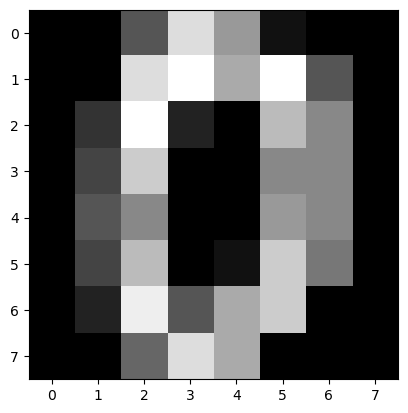

In [10]:
plt.imshow(digits['data'][0].reshape(8,8), cmap='gray')
plt.show()

`plt.imshow` nos permite representar el array en cuestión como mapa de bits.

En este caso, se observa una representación del número `0`.

Veamos otro ejemplo...

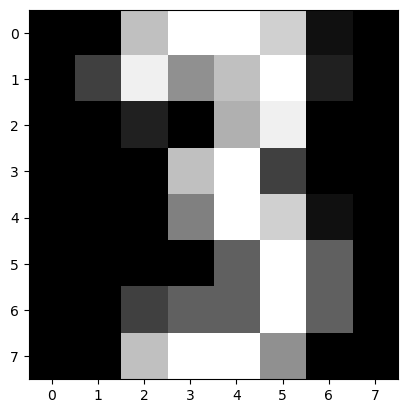

In [16]:
plt.imshow(digits['data'][345].reshape(8,8), cmap='gray')
plt.show()

No obstante, `digits` incluye una función para revisar las distintas imágenes de una manera más simple.

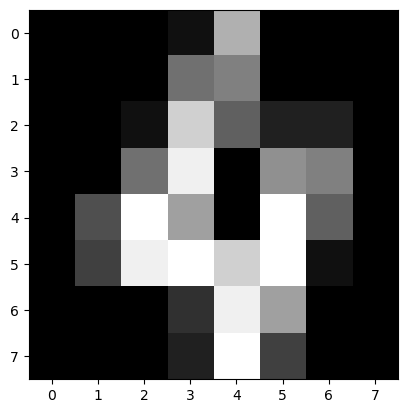

In [17]:
plt.imshow(digits.images[4], cmap='gray')
plt.show()

#### ¿Cómo aplicar los autoencoders en este caso?

In [20]:
# Declarar x que contenga todas las imágenes
x = digits.data

In [21]:
# Normalizar los datos a un rango de 0 a 1
x = x / 16.0

**NOTA DE FEDERICO:** Típicamente, los números de dígitos tienen valores en el rango de 0 a 16 para cada píxel.

In [22]:
x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((1437, 64), (360, 64))

In [23]:
# Construir el autoencoder
input_image = Input(shape=(64,))

**NOTA DE FEDERICO:**

Con `input_image`, estamos instanciando una nueva capa de entrada que llamamos "capa tensorial". Básicamente, es la forma específica que el modelo va a esperar que tenga nuestros datos, y en `shape=(64,)` le estamos diciendo que nuestros arrays de 8x8 van a ser pasados de manera "aplanada" en un solo array 1D. Este es nuestro punto de partida para construir un modelo de **red neuronal**.

Es decir, todo esto tiene que ver con la **necesidad del modelo** de **cómo va a ver los datos**: nosotros (humanos) preferimos verlos en un mapa de bits de 8x8, pero para el modelo va a ser más fácil verlos en una sola línea.

In [25]:
encoded = Dense(32, activation='relu')(input_image)

**NOTA DE FEDERICO:**

En `encode` se genera una **red neuronal**, o más específicamente, una "capa densa", es decir, una capa con muchísimos puntos o nodos de información (de ahí lo "denso"), y que todos esos nodos van a estar conectados entre sí, como una red de neuronas, donde cada neurona tiene una conexión directa con cada una de las demás neuronas.

El primer parámetro que nos pide `Dense` es el número de nodos (o "neuronas"). Federico ha escogido `32` solamente para el caso: no hay un valor fijo o estándar, solo ha estimado la mitad de la cantidad total de pixeles que tiene la imagen.

El número a usar en otros casos va a depender de muchos otros factores, de objetos específicos del modelo y del conjunto de datos con los que se esté trabajando, y todo ello puede influir en la capacidad del modelo para aprender patrones complejos de los datos. Por ejemplo:

- Si tenemos un **número elevado de nodos**, puede aumentar la capacidad del modelo para **aprender detalles finos** de los datos de entrenamiento (útil para un dataset muy complejo y variado), pero también aumenta el riesgo de que el modelo aprenda "tanto" que **aprende incluso el "ruido"** de los datos de entrenamiento en lugar de las relaciones importantes generales, perjudicando su rendimiento en datos nuevos.

- Si tenemos un **número muy bajo de nodos**, el modelo no podría tener la capacidad suficiente para aprender adecuadamente los patrones de interés en los datos, generando un modelo demasiado simple, **incapaz de capturar la estructura subyacente** de los datos.

De ahí que el valor de `32` sea un compromiso entre ambos extremos, para tener una capacidad de aprendizaje razonable en función de las características de los datos de entrada, en este caso en particular.

El segundo parámetro, `activation`, especifica la función de activación que se va a utilizar para esta "capa densa". Federico ha declarado el valor `'relu'` (que refiere a ["Rectified Linear Unit"](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))), que es una de las funciones de activación más comunes en las redes neuronales por su simplicidad y eficacia.

El tercer parámetro (que está en sus propios paréntesis) corresponde a los datos de entrada. Es decir, la "capa densa" debe aplicarse a los datos de entrada que hemos definido en `input_image`.

**NOTA PERSONAL:** Para entender esto más gráficamente:

![flatten-and-dense-layers-computer-vision-with-keras-p-6-dense-layer-scheme-1024x723.jpg](https://pysource.com/wp-content/uploads/2022/08/flatten-and-dense-layers-computer-vision-with-keras-p-6-dense-layer-scheme-1024x723.jpg)

En la "capa densa", cada nodo recibe los datos de entrada y cada nodo va modificando un poco dichos datos en función de sus propias reglas internas antes de pasarlos al siguiente. Es decir, la red de una "capa densa" es como un grupo de personas trabajando juntas procesando "mensajes", en donde cada persona puede "pensar" el mensaje y contribuir un poco en el procesamiento de esos mensajes de manera diferente, de acuerdo a sus propias características (su propio "peso"), transformando el mensaje y llevándolo a la salida de la capa, donde se combinan todos los "puntos de vista".

In [ ]:
# Construir el decodificador
decoded = Dense(64, activation='sigmoid')(encoded)

La variable `decoded` es también una "capa densa" como `encoded`, pero sus parámetros poseen otros valores:

1. Se ha escogido `64` nodos, pues suele ser la misma cantidad de puntos de entrada (en este caso, los 64 pixeles de la imagen original).
2. La función de activación `'sigmoid'` convierte los valores de entrada a la capa en valores entre 0 y 1, ya que los datos de entrada también estaban normalizados afín.